In [1]:
#https://parulpandey.com/2020/08/17/advanced-plots-in-matplotlib%E2%80%8A-%E2%80%8Apart-2/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

# Data

In [8]:
df = pd.DataFrame()

df['description']  = ['Gingerbread', 'Ice Cream Sandwich', 'Jelly Bean', 'KitKat', 'Lollipop', 'Marshmallow', 'Nougat', 'Oreo', 'Pie', '10', '11']

df['date']  = ['2011-02-9', '2011-10-19', '2012-11-13', '2013-10-31', '2014-11-3', '2015-10-5', '2016-08-22', '2017-08-21', '2018-08-06', '2019-09-3', '2020-02-19']
# Convert date strings (e.g. 2014-10-18) to datetime
df['date']  = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [11]:
df

,description,date
0,Gingerbread,2011-02-09
1,Ice Cream Sandwich,2011-10-19
2,Jelly Bean,2012-11-13
3,KitKat,2013-10-31
4,Lollipop,2014-11-03
5,Marshmallow,2015-10-05
6,Nougat,2016-08-22
7,Oreo,2017-08-21
8,Pie,2018-08-06
9,10,2019-09-03


# Plot

In [12]:
# Choose some nice levels
kernel = [-5, 5, -3, 3, -1, 1]
df['level'] = np.tile(kernel,
                       int(np.ceil(len(df)/len(kernel))))[:len(df)]

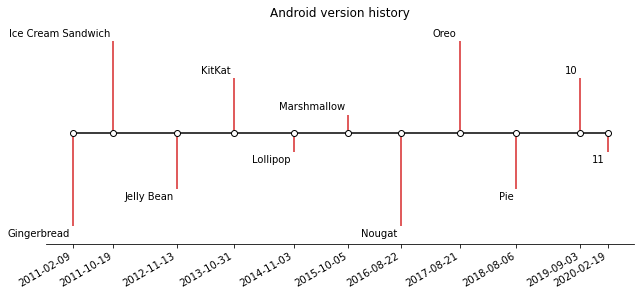

In [14]:
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)

ax.set(title='Android version history')

markerline, stemline, baseline = ax.stem(df['date'], 
                                         df['level'],
                                         linefmt='C3-', 
                                         basefmt='k-',
                                         use_line_collection=True)
plt.setp(markerline, 
         mec='k', 
         mfc='w', 
         zorder=3)
 
# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(df)))
 
# annotate lines
vert = np.array(['top', 'bottom'])[(df['level'] > 0).astype(int)]
for d, l, r, va in zip(df['date'], 
                       df['level'], 
                       df['description'], 
                       vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords='offset points', va=va, ha='right')
 
# format xaxis with 10 month intervals
if True:
    ax.set_xticks(df['date'])
else:
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=10))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
 
# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ['left', 'top', 'right']:
    ax.spines[spine].set_visible(False)
ax.margins(y=0.1)